In [1]:
import pandas as pd
import json
import os
import sys
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import string 
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split  
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
from pandas.io.json import json_normalize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_json('D:/msc folder/practicum/project/dataset/Dataset for Detection of Cyber-Trolls.json', lines= True)
dict=df.iloc[:,:1]
annotation_df = json_normalize(dict['annotation'])
label_df=annotation_df.iloc[:,:1]
new_label=pd.DataFrame()
new_label['label'] = label_df['label']
new_label['label'] = label_df['label'].map(lambda x: re.sub(r'\W+', '', str(x)))
df['annotation'] = new_label['label']
df = df.rename(columns={'annotation': 'label'})
df.head()

,label,content,extras
0,1,Get fucking real dude.,NaN
1,1,She is as dirty as they come and that crook ...,NaN
2,1,why did you fuck it up. I could do it all day...,NaN
3,1,Dude they dont finish enclosing the fucking s...,NaN
4,1,WTF are you talking about Men? No men thats n...,NaN


In [3]:
X = df["content"]  
y = df["label"]

processed_tweets = []

for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)

    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 

    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
    
    #Removing punctuation
    processed_tweet = processed_tweet.translate(str.maketrans('', '', string.punctuation))

    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()

    processed_tweets.append(processed_tweet)
processed_tweets


[' get fucking real dude ',
 ' she is as dirty as they come and that crook rengel the dems are so fucking corrupt it a joke make republicans look like ',
 ' why did you fuck it up could do it all day too let do it when you have an hour ping me later to sched writing book here ',
 ' dude they dont finish enclosing the fucking showers hate half assed jobs whats the reasononing behind it makes no sense ',
 ' wtf are you talking about men no men thats not menage that just gay ',
 'ill save you the trouble sister here comes big ol fuck france block coming your way here on the twitter ',
 ' im dead serious real athletes never cheat don even have the appearance of at his level fuck him dude seriously think he did',
 ' go absolutely insane hate to be the bearer of bad news lol dont shoot the messenger cause we all know you bought that pistol',
 'lmao im watching the same thing ahaha the gay guy is hilarious dede having good day and dont want anyone to mess it up ',
 'lol no he said what do you

In [38]:
df["processed tweet"]=processed_tweets

In [39]:
bully_df=df

In [40]:
bully_df_idx=df[df['label'] == '0' ].index

In [41]:
bully_df.drop(bully_df_idx , inplace=True)

In [231]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt  

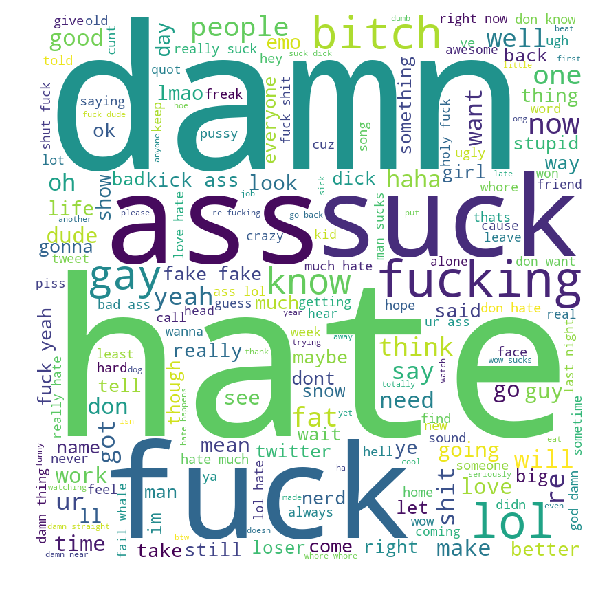

In [247]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for tweets in bully_df['processed tweet']: 
      
    # typecaste each val to string 
    val = str(tweets) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [5]:
porter = PorterStemmer()
class TfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: ([porter.stem(w) for w in analyzer(doc)])

vectorizer_s = TfidfVectorizer(max_features=2000,smooth_idf=True,use_idf=True, stop_words=stopwords.words('english'))
X = vectorizer_s.fit_transform(processed_tweets).toarray()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100, 120, 140],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(rfc, param_grid=param_grid, cv= 5,scoring='accuracy')
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 120, 140], 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [7]:
CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [7]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=0,shuffle=True)


def cross_validate(model):
# these are you training data points:
# features and targets

    accuracies=[]
    for train_index, test_index in kf.split(X):

        data_train   = X[train_index]
        target_train = y[train_index]

        data_test    = X[test_index]
        target_test  = y[test_index]

        # if needed, do preprocessing here
  
        model.fit(data_train, target_train)

        model_pred = model.predict(data_test)

        # accuracy for the current fold only    
        accuracy = accuracy_score(target_test,model_pred)
        print("Train index ",train_index," accuracy ",accuracy)
        accuracies.append(accuracy)

        # this is the average accuracy over all folds
    average_accuracy = np.mean(accuracies)
    print("Average accuracy : ",average_accuracy)

In [17]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [11]:

cross_validate(text_classifier)

Train index  [    0     1     2 ... 19998 19999 20000]  accuracy  0.9277680579855037
Train index  [    0     1     2 ... 19995 19997 19999]  accuracy  0.9225
Train index  [    1     4     6 ... 19997 19998 20000]  accuracy  0.9295
Train index  [    0     2     3 ... 19998 19999 20000]  accuracy  0.921
Train index  [    0     1     2 ... 19998 19999 20000]  accuracy  0.93275
Average accuracy :  0.9267036115971006


In [10]:
grid={"C":[1,50,100], "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=4)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 50, 'penalty': 'l2'}
accuracy : 0.7491875


In [7]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(C=50,penalty="l2")
cross_validate(LR_clf)

Train index  [    0     1     2 ... 19998 19999 20000]  accuracy  0.754811297175706
Train index  [    0     1     2 ... 19995 19997 19999]  accuracy  0.74825
Train index  [    1     4     6 ... 19997 19998 20000]  accuracy  0.76075
Train index  [    0     2     3 ... 19998 19999 20000]  accuracy  0.75925
Train index  [    0     1     2 ... 19998 19999 20000]  accuracy  0.75075
Average accuracy :  0.7547622594351411


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
#Import svm model
from sklearn import svm
from sklearn.svm import SVC

#Create a svm Classifier
#clf = svm.SVC(kernel='linear') # Linear Kernel
clf_svm = svm.SVC(kernel='linear')



In [37]:
cross_validate(clf_svm)

Train index  [    0     1     2 ... 19998 19999 20000]  accuracy  0.7488127968007998
Train index  [    0     1     2 ... 19995 19997 19999]  accuracy  0.74275
Train index  [    1     4     6 ... 19997 19998 20000]  accuracy  0.7455
Train index  [    0     2     3 ... 19998 19999 20000]  accuracy  0.7535
Train index  [    0     1     2 ... 19998 19999 20000]  accuracy  0.75275
Average accuracy :  0.74866255936016


In [20]:
clf_svm.probability = True

In [9]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
# Model Generation Using Multinomial Naive Bayes
NB_clf = MultinomialNB().fit(X_train, y_train)

In [10]:

cross_validate(NB_clf)

Train index  [    0     1     2 ... 19998 19999 20000]  accuracy  0.7190702324418895
Train index  [    0     1     2 ... 19995 19997 19999]  accuracy  0.71525
Train index  [    1     4     6 ... 19997 19998 20000]  accuracy  0.70725
Train index  [    0     2     3 ... 19998 19999 20000]  accuracy  0.72
Train index  [    0     1     2 ... 19998 19999 20000]  accuracy  0.71225
Average accuracy :  0.7147640464883779


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn_clf = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1,3)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_clf, param_grid, cv=5)
knn_gscv.fit(X_train,y_train)
knn_gscv.best_params_

{'n_neighbors': 1}

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1)


In [12]:
# Train the model using the training sets
cross_validate(knn_clf)

Train index  [    0     1     2 ... 19998 19999 20000]  accuracy  0.7960509872531867
Train index  [    0     1     2 ... 19995 19997 19999]  accuracy  0.78525
Train index  [    1     4     6 ... 19997 19998 20000]  accuracy  0.79475
Train index  [    0     2     3 ... 19998 19999 20000]  accuracy  0.789
Train index  [    0     1     2 ... 19998 19999 20000]  accuracy  0.7875
Average accuracy :  0.7905101974506373


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
model = xgb.XGBClassifier()


In [18]:

param_grid = {"learning_rate"    : [0.1, 0.3,0.5] ,
 "gamma"            : [ 0.0, 0.1, 0.2],
 "colsample_bytree" : [  0.4, 0.5 ] }

grid = GridSearchCV(model,param_grid,refit = True, verbose=2)
grid.fit(X_train,y_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.7s remaining:    0.0s


[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, total=  35.2s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, total=  33.2s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, total=  33.4s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, total=  32.8s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, total=  32.7s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, total=  32.7s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.5, total=  32.7s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.5, total=  32.6s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.5, total=  32.7s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, total=  34.2s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, total=  33.4s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, total=  32.7s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, total=  32.7s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, total=  33.1s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, total=  33.0s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.5, total=  32.7s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.5, total=  32.7s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.5, total=  32.9s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, total=  35.4s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, total=  32.7s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, total=  32.7s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, total=  32.7s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, total=  32.9s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, total=  32.8s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.5, total=  32.8s


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.5 ..............
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.5, total=  33.3s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.5, total=  33.2s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, total=  36.3s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, total=  36.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, total=  36.1s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, total=  36.4s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, total=  35.9s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, total=  35.9s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.5, total=  35.9s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.5, total=  35.9s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.5, total=  35.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, total=  35.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, total=  35.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, total=  36.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, total=  35.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, total=  35.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, total=  36.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.5, total=  36.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.5, total=  36.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.5, total=  36.1s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, total=  36.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, total=  35.9s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, total=  36.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, total=  35.9s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, total=  35.8s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.3 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, total=  36.1s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.5, total=  36.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.5, total=  35.9s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.5 ..............


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 31.7min finished


[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.5, total=  36.0s


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.3, 0.5], 'gamma': [0.0, 0.1, 0.2], 'colsample_bytree': [0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [20]:
grid.best_params_

{'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.5}

In [14]:
clf_xgb = xgb.XGBClassifier(n_estimators=1200, colsample_bytree= 0.5, gamma= 0.2, learning_rate= 0.5)

In [16]:
cross_validate(clf_xgb)

C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Train index  [    0     1     2 ... 19998 19999 20000]  accuracy  0.8535366158460385


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Train index  [    0     1     2 ... 19995 19997 19999]  accuracy  0.86325


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Train index  [    1     4     6 ... 19997 19998 20000]  accuracy  0.856


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Train index  [    0     2     3 ... 19998 19999 20000]  accuracy  0.856


C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Train index  [    0     1     2 ... 19998 19999 20000]  accuracy  0.85075
Average accuracy :  0.8559073231692077


In [18]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn ',knn_clf),('text_classifier',text_classifier),('XGboost',clf_xgb)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.923519120219945

In [19]:
y_pred=ensemble.predict(X_test)

C:\Users\mail2\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
cross_validate(ensemble)

Train index  [    0     1     2 ... 19998 19999 20000]  accuracy  0.8832791802049488
Train index  [    0     1     2 ... 19995 19997 19999]  accuracy  0.88525
Train index  [    1     4     6 ... 19997 19998 20000]  accuracy  0.8855
Train index  [    0     2     3 ... 19998 19999 20000]  accuracy  0.885
Train index  [    0     1     2 ... 19998 19999 20000]  accuracy  0.8825
Average accuracy :  0.8843058360409899


In [ ]:
y_test=y_test.astype(int)
y_pred=y_pred.astype(int)
X_test=X_test.astype(int)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred))

0.923519120219945


In [21]:
print(confusion_matrix(y_test, y_pred))    

[[2274  175]
 [ 131 1421]]


In [22]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.93      0.94      2449
          1       0.89      0.92      0.90      1552

avg / total       0.92      0.92      0.92      4001



In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

In [28]:
classifiers = [ensemble]

In [29]:
y_test=y_test.astype(int)
y_pred=y_pred.astype(int)

In [30]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:,1]
    
    fpr, tpr, threshhold = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

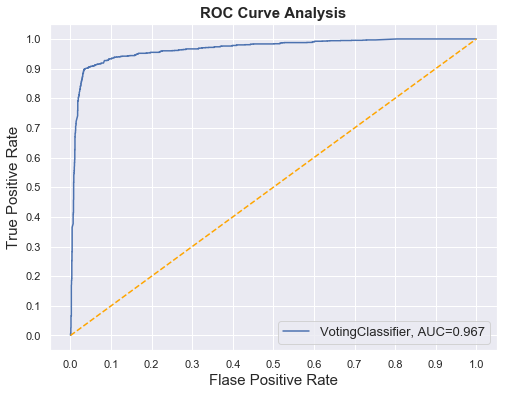

In [32]:

warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

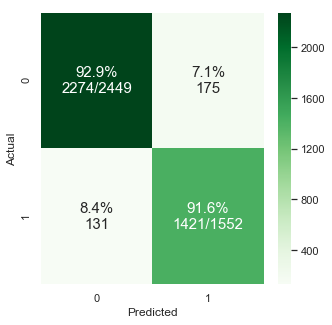

In [25]:
def plot_cm(y_test, y_pred, figsize=(5,5)):
    cm = confusion_matrix(y_test, y_pred)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    g=sns.heatmap(cm, cmap= "Greens", annot=annot, fmt='', annot_kws={"size": 15},ax=ax)
    g.figure.axes[-1].yaxis.label.set_size(20)
    
plot_cm(y_test, y_pred)

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from nltk.stem.snowball import SnowballStemmer
from sklearn.manifold import TSNE
from keras.layers import MaxPool1D
from keras.layers import Input
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.models import Sequential
from keras import layers
from sklearn.externals import joblib
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [323]:
df1=df
input_dim = X_train.shape[1]

In [324]:
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    ## Stemming
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text
# apply the above function to df['text']
df1['tweet'] = df['content'].map(lambda x: clean_text(x))

In [325]:
### Create sequence
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(df1['tweet'])
sequences = tokenizer.texts_to_sequences(df1['tweet'])
data = pad_sequences(sequences, maxlen=50)

In [326]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)

In [327]:
MAX_SEQUENCE_LENGTH=20000

In [340]:
cnn_clf = Sequential()
cnn_clf.add(layers.Embedding(20000, 120, input_length=50))
cnn_clf.add(layers.Conv1D(64, 3, activation='relu'))
cnn_clf.add(layers.GlobalMaxPooling1D())
cnn_clf.add(layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.02)))
cnn_clf.add(layers.Dense(1, activation='sigmoid'))
cnn_clf.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
cnn_clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 50, 120)           2400000   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 48, 64)            23104     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 2,423,765
Trainable params: 2,423,765
Non-trainable params: 0
_________________________________________________________________


In [341]:
cnn_clf.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history=cnn_clf.fit(x=X_train,y=y_train,batch_size=50,epochs=3,validation_split=0.2,shuffle=True,verbose=True)

Train on 12800 samples, validate on 3200 samples
Epoch 1/3
12800/12800 [==============================] - 16s 1ms/step - loss: 0.7093 - acc: 0.6841 - val_loss: 0.5126 - val_acc: 0.7681
Epoch 2/3
12800/12800 [==============================] - 15s 1ms/step - loss: 0.3970 - acc: 0.8403 - val_loss: 0.4225 - val_acc: 0.8191
Epoch 3/3
12800/12800 [==============================] - 15s 1ms/step - loss: 0.2275 - acc: 0.9269 - val_loss: 0.3841 - val_acc: 0.8569


In [342]:
loss, accuracy = cnn_clf.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = cnn_clf.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9448
Testing Accuracy:  0.8510


In [331]:
from keras import regularizers
lstm_clf = Sequential()
lstm_clf.add(Embedding(20000, 120, input_length=50))
lstm_clf.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
lstm_clf.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.1)))
lstm_clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
## Fit the model
test=lstm_clf.fit(x=X_train,y=y_train,epochs=3,validation_split=0.1,shuffle=True,verbose=True)

Train on 14400 samples, validate on 1600 samples
Epoch 1/3
14400/14400 [==============================] - 40s 3ms/step - loss: 0.6229 - acc: 0.6858 - val_loss: 0.4998 - val_acc: 0.7581
Epoch 2/3
14400/14400 [==============================] - 38s 3ms/step - loss: 0.4238 - acc: 0.8219 - val_loss: 0.4397 - val_acc: 0.8119
Epoch 3/3
14400/14400 [==============================] - 38s 3ms/step - loss: 0.3262 - acc: 0.8827 - val_loss: 0.4455 - val_acc: 0.8163


In [343]:
accr = lstm_clf.evaluate(X_test,y_test)

4001/4001 [==============================] - 2s 486us/step


In [344]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.447
  Accuracy: 0.808


In [347]:
nn_clf = Sequential()
nn_clf.add(Embedding(20000, 120, input_length=50))
nn_clf.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.02)))
nn_clf.add(Flatten())
nn_clf.add(Dense(1, activation='sigmoid'))
nn_clf.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [348]:
history = nn_clf.fit(X_train,y_train,epochs=3,validation_data=(X_test,y_test))

Train on 16000 samples, validate on 4001 samples
Epoch 1/3
16000/16000 [==============================] - 30s 2ms/step - loss: 0.7863 - acc: 0.6635 - val_loss: 0.5138 - val_acc: 0.7488
Epoch 2/3
16000/16000 [==============================] - 27s 2ms/step - loss: 0.4278 - acc: 0.8199 - val_loss: 0.4418 - val_acc: 0.8013
Epoch 3/3
16000/16000 [==============================] - 27s 2ms/step - loss: 0.3252 - acc: 0.8752 - val_loss: 0.4266 - val_acc: 0.8153


In [349]:
y_pred = nn_clf.predict(X_test)
y_pred=(y_pred>0.5)
len(y_pred)
y_pred1=[int(elem) for elem in y_pred]
y_pred1=y_pred.astype(int)
y_test1=[int(elem) for elem in y_test]
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test1,y_pred1))  
print(classification_report(y_test1,y_pred1))  
print(accuracy_score(y_test1, y_pred1))

[[2033  396]
 [ 343 1229]]
             precision    recall  f1-score   support

          0       0.86      0.84      0.85      2429
          1       0.76      0.78      0.77      1572

avg / total       0.82      0.82      0.82      4001

0.815296175956011


In [350]:
from keras.models import load_model
numOfModels=3
models=[cnn_clf,nn_clf,lstm_clf]


In [351]:
def ensembleModels(models, model_input):
    # collect outputs of models in a list
    yModels=[model(model_input) for model in models] 
    # averaging outputs
    yAvg=layers.average(yModels) 
    # build model from same input and avg output
    modelEns = Model(inputs=model_input, outputs=yAvg,    name='ensemble')  
   
    return modelEns

In [352]:
model_input = Input(shape=models[0].input_shape[1:]) # c*h*w
modelEns = ensembleModels(models, model_input)
modelEns.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
sequential_9 (Sequential)       (None, 1)            2423765     input_2[0][0]                    
__________________________________________________________________________________________________
sequential_11 (Sequential)      (None, 1)            2410945     input_2[0][0]                    
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 1)            2447425     input_2[0][0]                    
__________________________________________________________________________________________________
average_2 

In [353]:
y=modelEns.predict(X_test)

In [354]:
y_pred = modelEns.predict(X_test)
y_pred=(y_pred>0.5)
len(y_pred)
y_pred1=[int(elem) for elem in y_pred]
y_pred1=y_pred.astype(int)
y_test1=[int(elem) for elem in y_test]


In [355]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test1,y_pred))  
print(classification_report(y_test1,y_pred))  
print(accuracy_score(y_test1, y_pred))

[[2051  378]
 [ 236 1336]]
             precision    recall  f1-score   support

          0       0.90      0.84      0.87      2429
          1       0.78      0.85      0.81      1572

avg / total       0.85      0.85      0.85      4001

0.8465383654086478


# Saving the better ensemble model of the two

Machine learning ensmeble model with accuracy 93.3% performs better than the deep learning ensemble with accuracy 0.88.
Therefore we save the better model and use it to classify tweets in future.

In [46]:
import pickle
filename = 'ensemble model.sav'
pickle.dump(ensemble, open(filename, 'wb'))

In [47]:
pickle.dump(vectorizer_s.vocabulary_,open("feature.pkl","wb"))